# Homework Starter — Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

df = pd.read_csv('../../project/data/processed/Merged_full.csv')

# # === Synthetic data generator (adapt or replace with your own data) ===
# #n = 160
# #df = pd.DataFrame({
#    # 'date': pd.date_range('2021-02-01', periods=n, freq='D'),
#     #'region': np.random.choice(['North','South','East','West'], size=n),
#     'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
#     'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
#     'transactions': np.random.poisson(lam=3, size=n),
# })
# base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
# df['spend'] = np.maximum(0, base).round(2)

# # inject a bit of missingness and outliers
# df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
# df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
# df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12
df.head()

,Unnamed: 0,date,VTI_close,VOO_close,SPY_close,SCHD_close,VIXY_close
0,3012,2011-10-20,62.090,55.59,121.66,24.980,99.15
1,3013,2011-10-21,63.260,56.66,123.97,25.470,93.73
2,3014,2011-10-24,64.320,57.38,125.49,25.607,87.99
3,3015,2011-10-25,63.006,56.27,123.05,25.187,93.70
4,3016,2011-10-26,63.690,56.81,124.30,25.447,89.81


## 1) First look

In [2]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3480 non-null   int64  
 1   date        3480 non-null   object 
 2   VTI_close   3480 non-null   float64
 3   VOO_close   3480 non-null   float64
 4   SPY_close   3480 non-null   float64
 5   SCHD_close  3480 non-null   float64
 6   VIXY_close  3480 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 190.4+ KB


(None,
 Unnamed: 0    0
 date          0
 VTI_close     0
 VOO_close     0
 SPY_close     0
 SCHD_close    0
 VIXY_close    0
 dtype: int64)

## 2) Numeric profile

In [3]:
desc = df[['VTI_close','VOO_close','SPY_close','SCHD_close','VIXY_close']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
VTI_close,3480.0,155.742274,65.241530,59.46,103.9475,140.755,206.8100,318.18,0.598720,-0.683366
VOO_close,3480.0,272.374197,135.816484,53.15,185.4250,252.130,378.7950,593.21,0.313655,-0.629925
SPY_close,3480.0,307.052227,133.132601,116.34,202.1475,274.300,412.1775,645.31,0.660990,-0.576531
SCHD_close,3480.0,50.390194,17.583288,24.25,36.6850,46.985,69.6325,85.06,0.381253,-1.168036
VIXY_close,3480.0,23.944325,14.251379,5.25,13.9925,20.310,29.0800,105.06,2.052618,6.143717


## 3) Distributions (TODO: add at least 3)

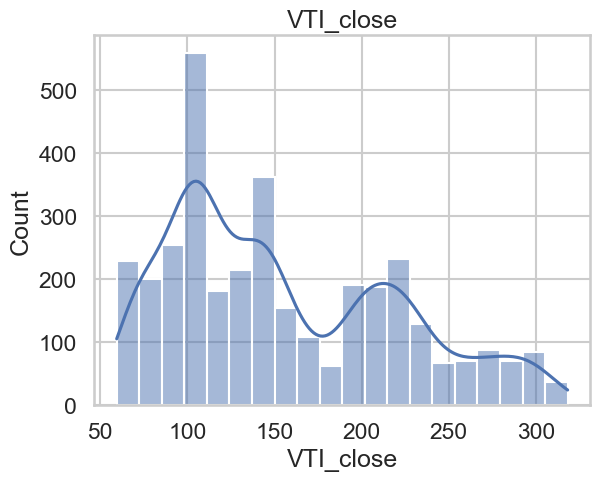

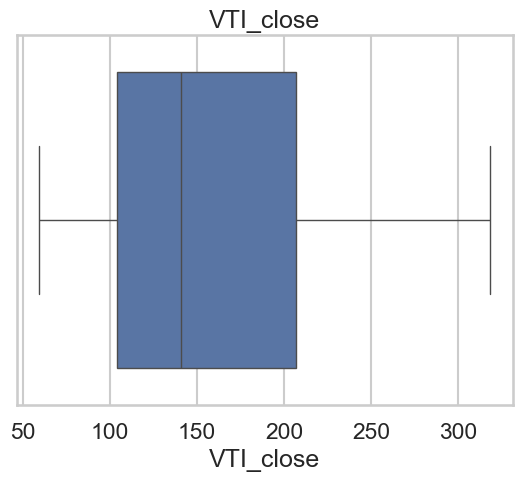

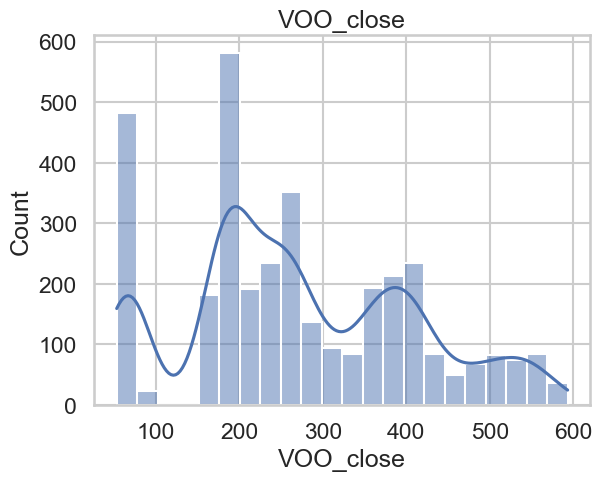

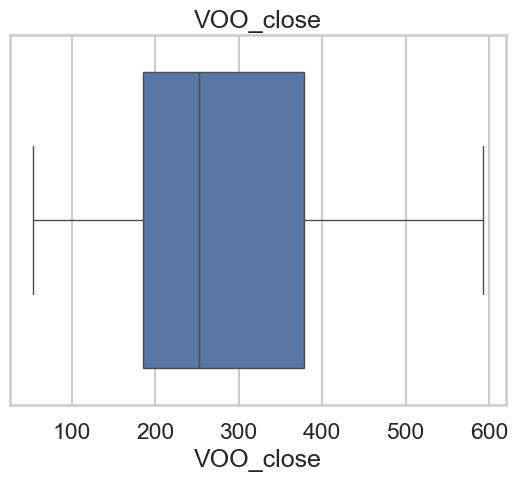

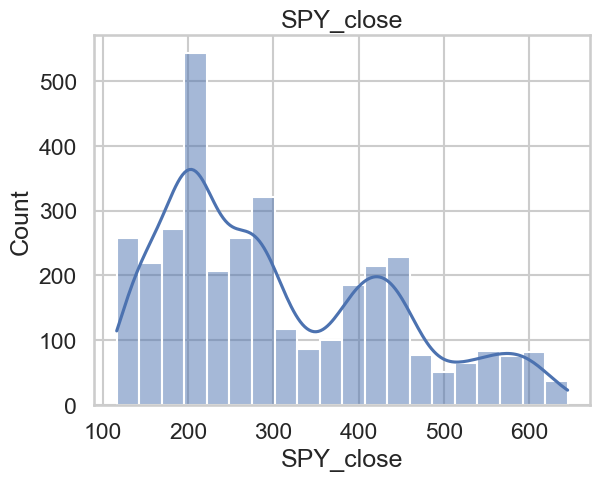

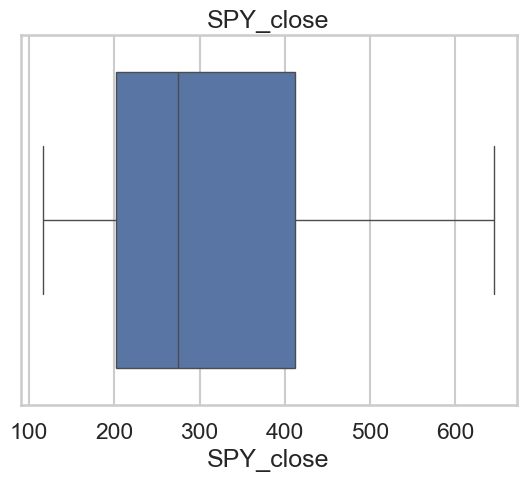

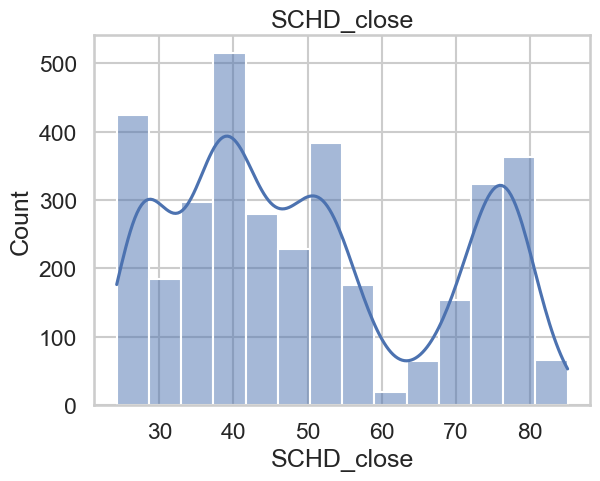

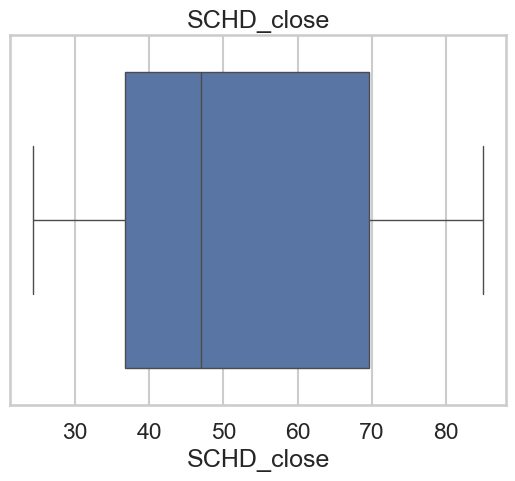

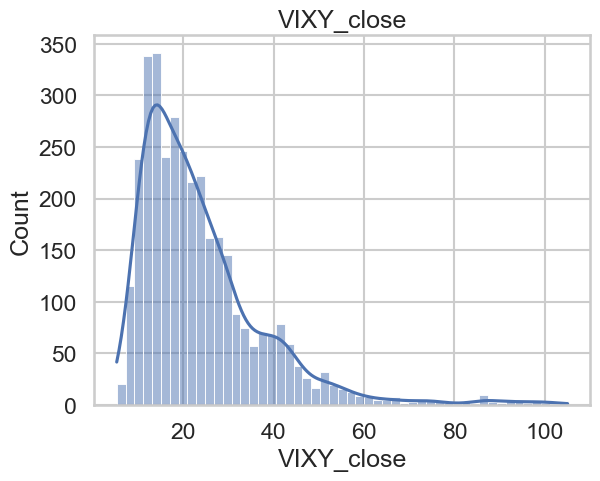

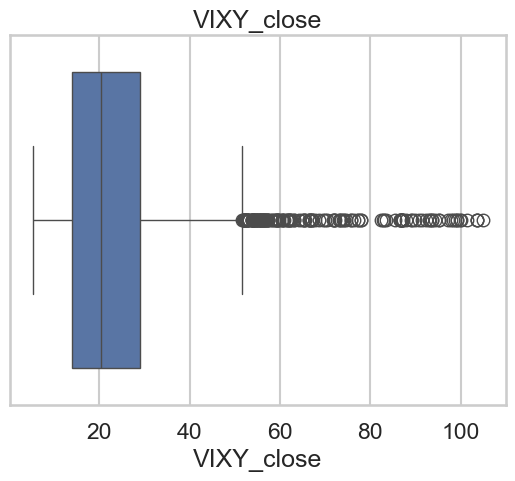

In [4]:
# TODO: histogram + KDE for a key variable
columns = ['VTI_close','VOO_close','SPY_close','SCHD_close','VIXY_close']
for i in columns:
    sns.histplot(df[i], kde=True)
    plt.title(i)
    plt.show()
    
    # TODO: boxplot for outliers
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

## Explanation

Since all cells are correlated in nature I will compare the columns to the VIXY etf which follows the VIX index to see how much volatility changes the value.

## 4) Relationships (TODO: add at least 2)

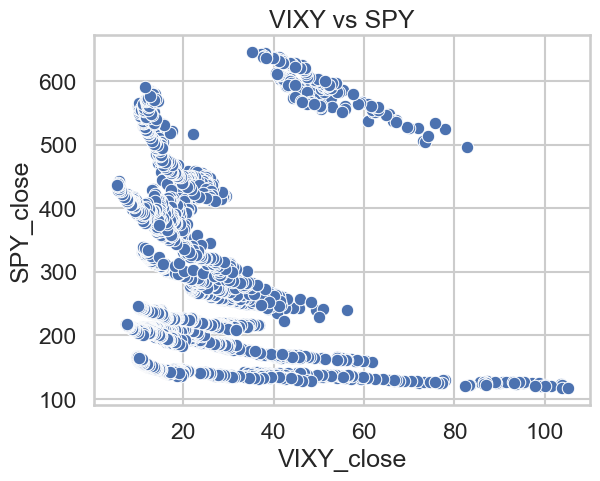

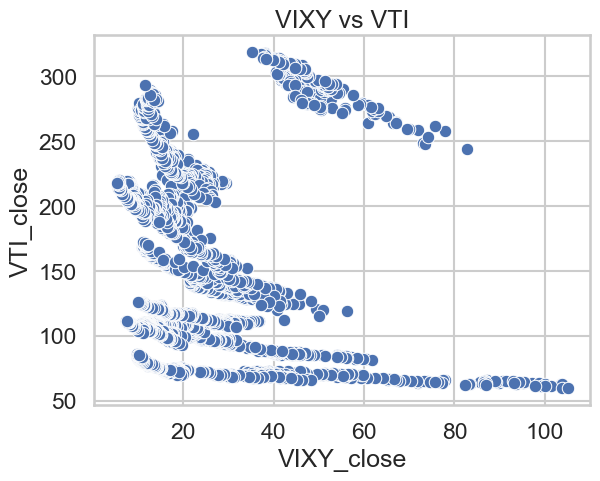

In [8]:
sns.scatterplot(data=df, x='VIXY_close', y='SPY_close')
plt.title('VIXY vs SPY')
plt.show()

sns.scatterplot(data=df, x='VIXY_close', y='VTI_close')
plt.title('VIXY vs VTI')
plt.show()

## 5) (Optional) Correlation matrix

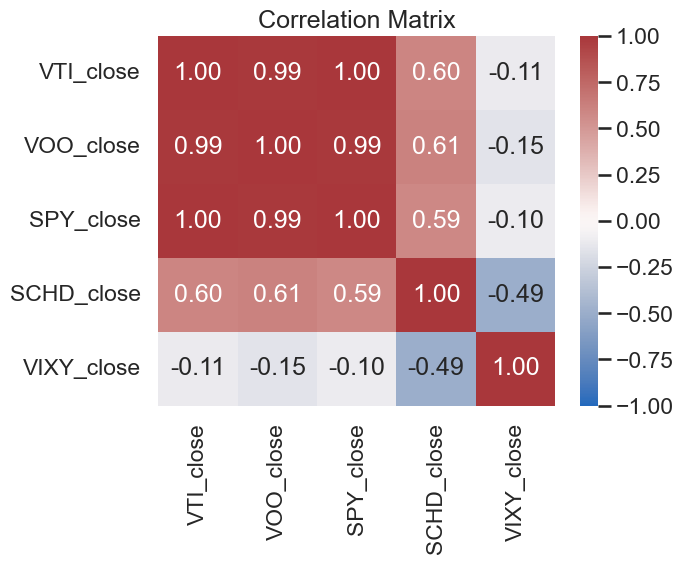

,VTI_close,VOO_close,SPY_close,SCHD_close,VIXY_close
VTI_close,1.000000,0.989450,0.999233,0.599588,-0.112838
VOO_close,0.989450,1.000000,0.988343,0.612918,-0.149948
SPY_close,0.999233,0.988343,1.000000,0.585876,-0.102889
SCHD_close,0.599588,0.612918,0.585876,1.000000,-0.493308
VIXY_close,-0.112838,-0.149948,-0.102889,-0.493308,1.000000


In [9]:
corr = df[columns].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr

## 6) Insights & Assumptions (write your commentary)
- TODO: Top 3 insights
- TODO: Assumptions & risks
- TODO: Next steps before modeling (cleaning & features)


Scatter plots for what we're studying in my project don't work all too well as the values both follow the same days but if we look at the correlation plot we see that the first three etfs follow the market nearly identically. What's more interesting is the correlation against the volatility index. While they do follow the market closely both ETFs are slightly more negatively correlated than the market itself. 

By comparing ETFs that are so heavily correlated to the market we may get incorrect assumptions about what "good" might look like, but using the secondary SCHD and VIXY to supplement the data and give a wholistic understanding of correlation/risk and what that would look like for predicting values.

We've already removed the missing data from the set, but the next addition would likely be normalizing the data so that we get put all values on an even footing as each etf is priced differently so 5% increase in SPY wouldn't match VOO and so on...